# Independence test 

Test the hypothesis of independence of two variables of classification.
Suppose that we wish to determine whether the opinions of the voting residents of the state of Illinois concerning a new tax reform are independent of their levels of income. A random sample of 1000 registered voters from the state of Illinois are classified as to whether they are in a low, medium, or high income bracket and whether or not they favor a new tax reform.


In [242]:
import plotly.graph_objects as go #For the graph
from scipy import stats #For the chi-squared distribution graph
import numpy as np #For the arrays
import pandas as pd #For the data frame
%matplotlib inline

In [238]:
data = pd.read_csv("data.csv") #Upload the csv 
data.head() #Shows the first 5 elements of the cvs

,Income,Tax Reform
0,Low,For
1,Low,For
2,Low,For
3,Low,For
4,Low,For


## Contingency table

A contingency table with r rows and c columns is referred to as an r x c table ("r x c" is read "r by c"). The row and column totals in Table 10.6 are called marginal frequencies.
The observed frequencies are presented in the table which is known as a contingency table.

In [239]:
#Create a contingency tables of the variables Income and Tax Reform
contingency_table = pd.crosstab(data['Tax Reform'],data['Income'],margins = True, margins_name="Total") #Change the margin name from teh default "All" to "Total"
contingency_table #Shows the table

Income,High,Low,Medium,Total
Tax Reform,,,,
Against,110,154,138,402
For,203,182,213,598
Total,313,336,351,1000


## Stacked bar chart for the contingency table

A stacked bar graph (or stacked bar chart)  is a chart that uses bars to show comparisons between categories of data, but with ability to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole.

Stacked bars do a good job of featuring the total and also providing a hint as to how the total for each category value is divided into parts.

In [243]:
#Creating a stack bar chart to visualize better how the data is 
Income = ["Low-Income", "Medium-Income", "High-Income"] #The x labels

#Do a stacked bar with plotly
fig = go.Figure(data=[go.Bar(name="For", x = Income, y = [182, 213, 203], marker_color ="peachpuff"), go.Bar(name="Against", 
x = Income, y = [154, 138, 110], marker_color = "lightpink")])

# Change the bar mode and add a tittle
fig.update_layout(barmode='stack', title_text='Tax Reform')

## Expected Values

To find these expected frequencies, let us define the following events:

```
L: A person selected is in the low-income level.
M: A person selected is in the medium-income level.
H: A person selected is in the high-income level.
F: A person selected is for the new tax reform.
A: A person selected is against the new tax reform.
```
By using the marginal frequencies, we can list the following probability estimates:

In [240]:
#The total of the sum of all the variables
Total = contingency_table.loc["Total", "Total"] #The loc is for selecting data by label

#Creating the probabilities of each case which is the value divided to the total
column_total = contingency_table.iloc[2,0:3].values #The iloc Selecting data by position/number. List of rows: [2,3] and slices: [0:2].
L = column_total[1]/Total 
M = column_total[2]/Total
H = column_total[0]/Total

row_total = contingency_table.iloc[0:2,3].values #The .values takes all the elements in that specific position
F = row_total[1]/Total
A = row_total[0]/Total

print("PROBABILITIES:")
print("P(L) =", L)
print("P(M) =", M)
print("P(H) =", H)
print("P(F) =", F)
print("P(A) =", A)

PROBABILITIES:
P(L) = 0.336
P(M) = 0.351
P(H) = 0.313
P(F) = 0.598
P(A) = 0.402


Now, if **Ho** is true and the two variables arc independent, we should have

In [182]:
#In statistics if two varibles are independent their intersection must be the same as their multiplication
print("P(L∩F) = P(L)P(F) = {0:.3f}" .format(L*F))
print("P(L∩A) = P(L)P(A) = {0:.3f}" .format(L*A))
print("P(M∩F) = P(M)P(F) = {0:.3f}" .format(M*F))
print("P(M∩A) = P(M)P(A) = {0:.3f}" .format(M*A))
print("P(H∩F) = P(H)P(F) = {0:.3f}" .format(H*F))
print("P(H∩A) = P(H)P(A) = {0:.3f}" .format(H*A))

P(L∩F) = P(L)P(F) = 0.201
P(L∩A) = P(L)P(A) = 0.135
P(M∩F) = P(M)P(F) = 0.210
P(M∩A) = P(M)P(A) = 0.141
P(H∩F) = P(H)P(F) = 0.187
P(H∩A) = P(H)P(A) = 0.126


### The expected frequencies 

Are obtained by multiplying each cell probability by the total number of observations, when **Ho** is true. The general rule for obtaining the expected frequency of any cell
is given by the following formula: expected frequency = (column total) x (row total) / grand total.

In [241]:
expected_frequency = [] #A list to save the expected frequencies
for j in range(2):
    for i in column_total:
        expected_frequency.append(i*row_total[j]/Total) #Adds to the list the total of a column x row total / Total
expected_frequency #Shows a list with the expected values

[125.826, 135.072, 141.102, 187.174, 200.928, 209.898]

## Observed Frequency

The observed frequencies are presented in the table, which is known as a contingency table.

In [184]:
#Creates an array with numpy that add specifically the inside values of each varibles
observed_frequency = np.append(contingency_table.iloc[0][0:3].values, contingency_table.iloc[1][0:3].values)
observed_frequency #Shows the array

array([110, 154, 138, 203, 182, 213], dtype=int64)

## Degrees of Freedom

The number of degrees of freedom associated with
the chi-squared test used here is equal to the number of cell frequencies that may
be filled in freely when we are given the marginal totals and the grand total, and in
this illustration that number is 2. A simple formula providing the correct number
of degrees of freedom is
u = ( r - 1 ) ( c - 1 ) .

In [185]:
#We use the specific formula for the degrees of freedom in wich we use the lenght of the rows and columns and we multiply them
u = (len(row_total)-1)*(len(column_total)-1)
print("Degrees of Freedom: {}".format(u))

Degrees of Freedom: 2


## The Null and Alternate Hypotheses

Our decision to accept or reject the null hypothesis, **Ho**, of independence between a voter's opinion concerning the new tax reform and his or her level of income is based upon how good a fit we have between the observed frequencies in each of the 6 cells of the table and the frequencies that we would expect for each cell under the assumption that **Ho** is true.

To test the null hypothesis of independence, we use the following decision criteria: 

$$X^2 = \sum \frac{oi - ei^2}{ei}$$

where the summation extends over all re cells in the r x c contingency table. If $$X^2 > X^2a$$ with u = (r - 1)(c - 1) degrees of freedom, reject the null hypothesis of independence at the a level of significance; otherwise, fail to reject the null
hypothesis.

In [186]:
#Summation for the decision criteria, rembeber that both our observed and expected values are arrays
chi_squared = ((observed_frequency - expected_frequency)**2/expected_frequency).sum()
chi_squared #Shows the float result

7.878211595034106

## The chi-squared distribution

From the chi squared table we find that $$X^2 0.05 = 5.991$$ for u = (2 - 1)(3 - 1) = 2 degrees of freedom and a 95% trust level meaning an alpha of = 0.05

No handles with labels found to put in legend.


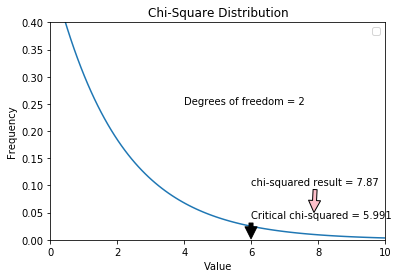

In [233]:
#Recreat a chi-squared distribution for 2 degrees of freedom showing where the Ho was null
x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = ['-']
deg_of_freedom = [2]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

ax.text(4,.25, 'Degrees of freedom = 2')

plt.annotate('chi-squared result = 7.87', xy=(7.87, .05), xytext=(6,.10), arrowprops=dict(facecolor='pink', shrink=0.005))

plt.annotate('Critical chi-squared = 5.991', xy=(5.991,0), xytext=(5.991,.04), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

## Conclusion

The null hypothesis is rejected and we conclude that a voter's opinion concerning the new tax reform and his or her level of income are not independent.
It is important to remember that the statistic on which we base our decision
has a distribution that is only approximated by the chi-squared distribution. The
computed x2-values depend on the cell frequencies and consequently are discrete.